In [5]:
import numpy as np
import pandas as pd

In [6]:
aqi = pd.read_csv("../datasets/c4_epa_air_quality.csv")

In [7]:
aqi.describe(include='all')

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
count,260.000000,260,260,260,260,257,260,260,260.000000,260.000000
unique,NaN,1,52,149,190,253,1,1,NaN,NaN
top,NaN,2018-01-01,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN,NaN
freq,NaN,260,66,14,21,2,260,260,NaN,NaN
mean,129.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.403169,6.757692
std,75.199734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.317902,7.061707
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,64.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.000000
50%,129.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276315,5.000000
75%,194.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516009,9.000000


In [12]:
rre_states = ['California','Florida','Michigan','Ohio','Pennsylvania','Texas']
aqi_rre = aqi[aqi["state_name"].isin(rre_states)]
aqi_rre.groupby('state_name').agg({"aqi":"mean","state_name":"count"})

,aqi,state_name
state_name,,
California,12.121212,66
Florida,5.500000,12
Michigan,8.111111,9
Ohio,3.333333,12
Pennsylvania,2.900000,10
Texas,2.700000,10


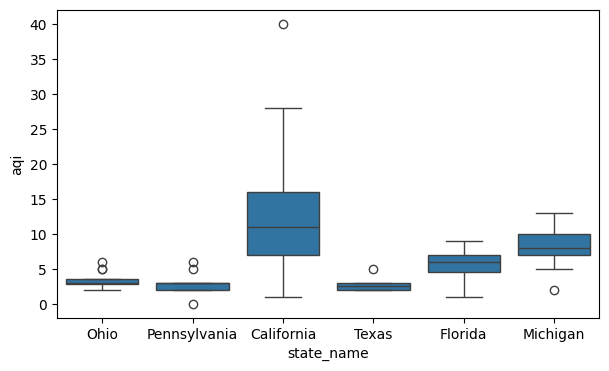

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
sns.boxplot(x="state_name", y="aqi", data=aqi_rre);

the highest mean for aqi is california's.

In [23]:
aqi_ca = aqi[aqi["state_name"] == "California"]
sample_mean = aqi_ca["aqi"].mean()
sample_std = aqi_ca["aqi"].std()
sample_std_err = sample_std / np.sqrt(len(aqi_ca))

In [24]:
#confidence interval for confidence level %95
conf_lvl = 0.95
#z-score for 95% is approximately 1.95
z_score = 1.96
margin_of_error = sample_std_err * z_score
margin_of_error

np.float64(1.7614930896609726)

In [25]:
upper_limit = sample_mean + margin_of_error
lower_limit = sample_mean - margin_of_error
print(upper_limit, lower_limit)

13.882705210873095 10.359719031551148


In [27]:
#alternatively i could have just use scipy.stats.norm.interval()
from scipy import stats
confidence_interval = stats.norm.interval(confidence=conf_lvl, loc=sample_mean, scale=sample_std_err)
confidence_interval

(np.float64(10.359751399400034), np.float64(13.882672843024208))